# EDA: entries.json

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from src.components.utils import read_json, parse_datetime

In [2]:
entries = read_json("../data/entries.json")
entries.head()

,_id,noise,sysTime,device,dateString,rssi,date,sgv,direction,unfiltered,filtered,type,utcOffset,scale,slope,intercept
0,1670830457083e714d391d71,1.0,2022-12-12T07:34:17.000Z,DEXCOM52,2022-12-12T07:34:17.000Z,100.0,1.670830e+12,156.0,Flat,171020.0,171972.0,sgv,0,NaN,NaN,NaN
1,1670829857504d574c2e41ad,1.0,2022-12-12T07:24:17.000Z,DEXCOM52,2022-12-12T07:24:17.000Z,100.0,1.670830e+12,157.0,FortyFiveDown,171156.0,176902.0,sgv,0,NaN,NaN,NaN
2,16708289569215b8b9471a93,1.0,2022-12-12T07:09:16.000Z,DEXCOM52,2022-12-12T07:09:16.000Z,100.0,1.670829e+12,166.0,Flat,179554.0,181458.0,sgv,0,NaN,NaN,NaN
3,1670829555675af8d53dbbc6,1.0,2022-12-12T07:19:15.000Z,DEXCOM52,2022-12-12T07:19:15.000Z,100.0,1.670830e+12,163.0,Flat,176868.0,178942.0,sgv,0,NaN,NaN,NaN
4,1670828657589b6156405dda,1.0,2022-12-12T07:04:17.000Z,DEXCOM52,2022-12-12T07:04:17.000Z,100.0,1.670829e+12,167.0,Flat,180642.0,180642.0,sgv,0,NaN,NaN,NaN


In [3]:
entries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         13464 non-null  object 
 1   noise       13431 non-null  float64
 2   sysTime     13464 non-null  object 
 3   device      13464 non-null  object 
 4   dateString  13464 non-null  object 
 5   rssi        13431 non-null  float64
 6   date        13464 non-null  float64
 7   sgv         13431 non-null  float64
 8   direction   13431 non-null  object 
 9   unfiltered  13431 non-null  float64
 10  filtered    13431 non-null  float64
 11  type        13464 non-null  object 
 12  utcOffset   13464 non-null  int64  
 13  scale       33 non-null     float64
 14  slope       33 non-null     float64
 15  intercept   33 non-null     float64
dtypes: float64(9), int64(1), object(6)
memory usage: 1.6+ MB


In [4]:
# percentage of missing entries
entries_missing = entries.isna().sum() / entries.isna().count()
entries_missing.columns = "% missing"
entries_missing.sort_values(ascending=False)

scale         0.997549
slope         0.997549
intercept     0.997549
noise         0.002451
rssi          0.002451
sgv           0.002451
direction     0.002451
unfiltered    0.002451
filtered      0.002451
_id           0.000000
sysTime       0.000000
device        0.000000
dateString    0.000000
date          0.000000
type          0.000000
utcOffset     0.000000
dtype: float64

In [5]:
entries.describe().T

,count,mean,std,min,25%,50%,75%,max
noise,13431.0,1.370561e+00,7.577212e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
rssi,13431.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
date,13464.0,1.672947e+12,1.235040e+09,1.670829e+12,1.671855e+12,1.672932e+12,1.674024e+12,1.675053e+12
sgv,13431.0,1.598518e+02,5.602446e+01,3.800000e+01,1.210000e+02,1.530000e+02,1.950000e+02,3.910000e+02
unfiltered,13431.0,1.971585e+05,5.576178e+04,2.040000e+02,1.571010e+05,1.917940e+05,2.320160e+05,4.731620e+05
filtered,13431.0,1.971521e+05,5.549841e+04,1.360000e+02,1.573180e+05,1.916240e+05,2.320500e+05,4.700530e+05
utcOffset,13464.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
scale,33.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
slope,33.0,9.147539e+02,9.005412e+01,7.692308e+02,9.134918e+02,9.259259e+02,9.259259e+02,1.134829e+03
intercept,33.0,4.100289e+04,4.398182e+04,-1.288325e+05,2.677462e+04,4.284994e+04,6.128510e+04,1.298221e+05


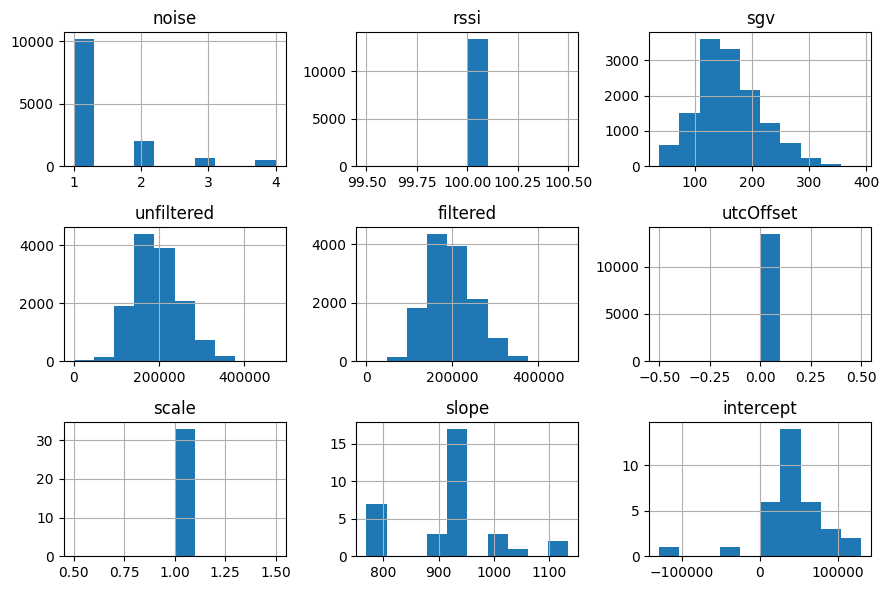

In [6]:
num_cols = [
    col for col in entries.columns 
    if entries[col].dtype != "O" and col != "date"
]

entries[num_cols].hist(figsize=(9, 6))
plt.tight_layout();

In [7]:
entries.describe(include="O").T

,count,unique,top,freq
_id,13464,13464,1670830457083e714d391d71,1
sysTime,13464,13462,2022-12-25T21:43:54.000Z,2
device,13464,1,DEXCOM52,13464
dateString,13464,13462,2022-12-25T21:43:54.000Z,2
direction,13431,8,Flat,8421
type,13464,2,sgv,13431


In [8]:
entries["type"].value_counts(normalize=True)

type
sgv    0.997549
cal    0.002451
Name: proportion, dtype: float64

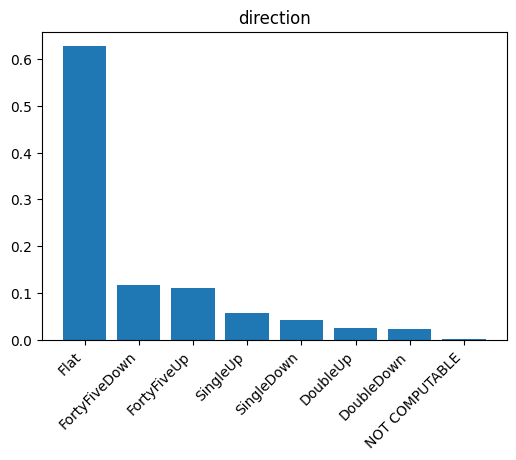

In [9]:
value_counts = entries["direction"].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
plt.bar(value_counts.index, value_counts.values)
plt.title("direction")
plt.xticks(value_counts.index, rotation=45, ha="right");

In [10]:
dt_cols = ["sysTime", "dateString"]
for col in dt_cols:
    entries[col] = parse_datetime(entries[col])

# number of unmatched dates
np.sum(entries["sysTime"] != entries["dateString"])

0

In [11]:
entries["sysTime"].min(), entries["sysTime"].max(), entries["sysTime"].dt.month.unique()

(Timestamp('2022-12-12 07:04:00'),
 Timestamp('2023-01-30 04:28:00'),
 array([12,  1], dtype=int32))